<a href="https://colab.research.google.com/github/dondreojordan/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

print(df.shape)
df.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


#**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
# Question is aking for random samples from the dataset of two different sample sizes
# df.sample(seed, random_state=42); seed= 20 or 200

df20 = df.sample(20, random_state=42)

print(df20.shape)
df20.head()

In [0]:
df200 = df.sample(200, random_state=42)

print(df200.shape)
df200.head()

#**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [24]:
df.columns

Index(['Unnamed: 0', 'Student', 'Employment', 'UndergradMajor', 'DevType',
       'YearsCoding', 'YearsCodingProf', 'ConvertedSalary', 'EducationTypes',
       'SelfTaughtTypes', 'TimeAfterBootcamp', 'LanguageWorkedWith', 'Gender',
       'Age', 'RaceEthnicity'],
      dtype='object')

In [23]:
print('total df Mean:')
print(df['ConvertedSalary'].mean())
# 'ConvertedSalary' column to the avg. for sample_size=2761
print('df20 Mean:')
print(df20['ConvertedSalary'].mean())
# 'ConvertedSalary' column to the avg for sample_size=20
print('df200 Mean:')
print(df200['ConvertedSalary'].mean())
# 'ConvertedSalary' column to the avg sample_size=200.

total df Mean:
73453.40420137631
df20 Mean:
55752.2
df200 Mean:
68551.255


#**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

>>*These sample means are estimates of an underlying population value that says,comparatively, we suggest to use the 'df200' dataframe since it has higher precision due to having a larger sample size of value at 200. In having more population within a sample, you can reduce the margin of error and have a more precise inference.* 

>>*A non-technical audience, like myself, has to understand first the word "population" and its importance to the samples in comparison. That "population", otherwise known as "sample_size", can directly impact the output of the random sample means. A non-technical audience would trust the input of more than of less in a population size.* 

#**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

In [26]:
df20_mean = df20['ConvertedSalary'].mean()
df200_mean = df200['ConvertedSalary'].mean()

difference = df200_mean - df20_mean

difference
# Below shows the difference of the sample means


12799.055000000008

>>*In observing the point estimates, you can infere from the variance of point estimates that sampling error is present, however, to what degree has yet to be defined.*


#**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



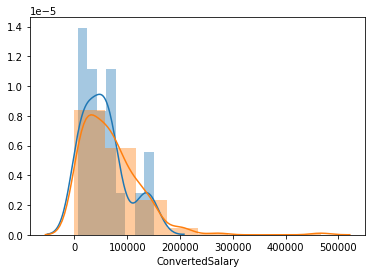

In [69]:
# Distrubution Plot
fig, ax = plt.subplots()
for graph in [df20['ConvertedSalary'], df200['ConvertedSalary']]:
  sns.distplot(graph, bins=8)

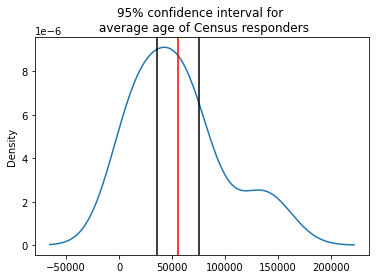

In [85]:
# Density Plot and overlay our Confidence Interval Bounds
df20['ConvertedSalary'].plot.density()
plt.axvline(df20_confidence[0], color='black')
plt.axvline(df20_confidence[1], color='red')
plt.axvline(df20_confidence[2], color='black')
plt.title('95% confidence interval for \n average age of Census responders')
plt.show()

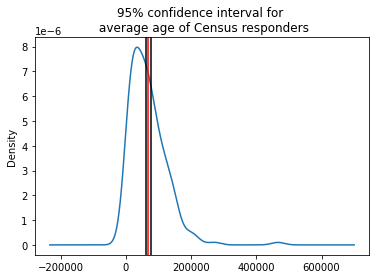

In [86]:
# Density Plot and overlay our Confidence Interval Bounds
df200['ConvertedSalary'].plot.density()
plt.axvline(df200_confidence[0], color='black')
plt.axvline(df200_confidence[1], color='red')
plt.axvline(df200_confidence[2], color='black')
plt.title('95% confidence interval for \n average age of Census responders')
plt.show()

In [0]:
# .plt.bar
plt.bar(x=0, height=df20_confidence[1], yerr=(df20_confidence[2]-df20_confidence[1]))
plt.bar(x=1, height=df200_confidence[1], yerr=(df200_confidence[2]-df200_confidence[1]))
plt.title ('95% confidence intervals for \n average age of Census respoonders')
plt.xticks(ticks=[0,1], labels=['Sample Size\n 20', 'Sample Size\n 200'])
plt.xlim(-.5, 1.5)
plt.show()

#. These are a few strategies to express to non-technical users the statistical errors could occur because a portion of the population is being surveyed:

#>Graphs

>>Distribustion Plots, Density Plot, error bars. 

#>Reporting the lower, mean and upper bounds

*Confidence Interval with sample size of 20*
CI1 = confidence_interval(sample1['age'])
CI1

*Confidence Interval with sample size of 200*
CI2 = confidence_interval(sample2['age'])
CI2

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

#**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [79]:
print('DF 20')
print(df20_mean)
print('DF 200')
print(df200_mean)


DF 20
55752.2
DF 200
68551.255


In [83]:
from scipy import stats

def confidence_interval(data, confidence=.95):
  # Make sure we're working with a numpy array
  sample = np.array(data)
  # Sample Mean
  x_bar = sample.mean()
  # Sample Standard Deviation
  s = np.std(sample, ddof=1)
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error
  std_err = s / np.sqrt(n)
  # Margin of Error
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

df20_confidence = confidence_interval(df20['ConvertedSalary'])
df20_confidence

#(Lower, Mid, Upper) Confidence Interval of df20.

(35805.10309625536, 55752.2, 75699.29690374463)

In [84]:
from scipy import stats

def confidence_interval(data, confidence=.95):
  # Make sure we're working with a numpy array
  sample = np.array(data)
  # Sample Mean
  x_bar = sample.mean()
  # Sample Standard Deviation
  s = np.std(sample, ddof=1)
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error
  std_err = s / np.sqrt(n)
  # Margin of Error
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

df200_confidence = confidence_interval(df200['ConvertedSalary'])
df200_confidence

#(Lower, Mid, Upper) Confidence Interval of df200.

(60593.058804479086, 68551.255, 76509.45119552092)

#**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

#**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

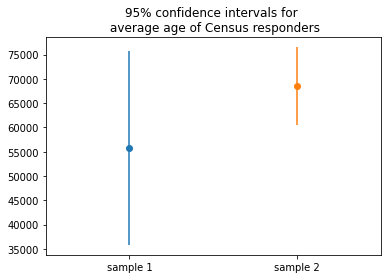

In [95]:
# .plt.errorbar
plt.errorbar(x=0, y=df20_confidence[1], yerr=(df20_confidence[2]-df20_confidence[1]), fmt='o')
plt.errorbar(x=1, y=df200_confidence[1], yerr=(df200_confidence[2]-df200_confidence[1]), fmt='o')
plt.title('95% confidence intervals for \n average age of Census responders')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

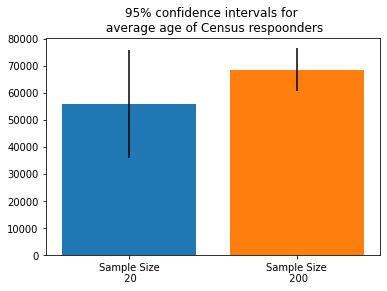

In [93]:
# .plt.bar
plt.bar(x=0, height=df20_confidence[1], yerr=(df20_confidence[2]-df20_confidence[1]))
plt.bar(x=1, height=df200_confidence[1], yerr=(df200_confidence[2]-df200_confidence[1]))
plt.title ('95% confidence intervals for \n average age of Census respoonders')
plt.xticks(ticks=[0,1], labels=['Sample Size\n 20', 'Sample Size\n 200'])
plt.xlim(-.5, 1.5)
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [111]:
print('df 20')
print(stats.bayes_mvs(df20['ConvertedSalary'], alpha=.95))
print('df200')
print(stats.bayes_mvs(df200['ConvertedSalary'], alpha=.95))

df 20
(Mean(statistic=55752.2, minmax=(35805.103096255356, 75699.29690374463)), Variance(statistic=2030231824.070588, minmax=(1050578278.806971, 3875133569.7855616)), Std_dev(statistic=44400.69826388984, minmax=(32412.625299518255, 62250.57083903377)))
df200
(Mean(statistic=68551.255, minmax=(60593.058804479086, 76509.45119552092)), Variance(statistic=3290420853.5025125, minmax=(2701340921.9536586, 4005612061.978935)), Std_dev(statistic=57289.44192847615, minmax=(51974.425652946455, 63289.90489785029)))


In [109]:
confidence_interval(df20['ConvertedSalary'])

(35805.10309625536, 55752.2, 75699.29690374463)

In [110]:
confidence_interval(df200['ConvertedSalary'])

(60593.058804479086, 68551.255, 76509.45119552092)

>>*Our estimates are precise and exactly reflect our calculations.*



**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

>*"Accuracy refers to the closeness of a measured value to a standard or known value."*

>>*In translation, asking the question are you in the ballpark range.*

>"Precision refers to the closeness of two or more measurements to each other...Precision is independent of accuracy. You can be very precise but inaccurate... You can also be accurate but imprecise."

>>*In summary, "precision" simply is the how close sample mean estimates are to the true mean.*

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

>>*The random samples will contain the tru population mean in 95% of the confidence intervals calculated. An example from the supplied link stated that "if you conducted 100 studies, you would produce 100 different confidence intervals." So, out of the 100 confidence intervals we expect the "population mean" to be one of the 95.*

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.